In [22]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [23]:
# import
atlantic=pd.read_csv('./atlantic.csv', usecols=['ID', 'Date', 'Status', 'Latitude', 'Longitude', 'Maximum Wind'])
pacific=pd.read_csv('./pacific.csv', usecols=['ID', 'Date', 'Status', 'Latitude', 'Longitude', 'Maximum Wind'])

In [24]:
# types and trim
atlantic = atlantic.astype({'Date': str})
pacific = pacific.astype({'Date': str})
atlantic['Latitude'] = atlantic.Latitude.str[:-1].astype(float)
atlantic['Longitude'] = atlantic.Longitude.str[:-1].astype(float)
pacific['Latitude'] = pacific.Latitude.str[:-1].astype(float)
pacific['Longitude'] = pacific.Longitude.str[:-1].astype(float)

In [25]:
# group by year and ID with means of Lat, Long and Max Wind for every unique ID
atlantic = atlantic.groupby([atlantic.Date.str[:3], 'ID']).mean().round(2)
pacific = pacific.groupby([pacific.Date.str[:3], 'ID']).mean().round(2)
print(atlantic)
#print(pacific)

               Latitude  Longitude  Maximum Wind
Date ID                                         
185  AL011851     28.84      97.91         60.71
     AL011852     27.98      79.67         73.33
     AL011853     32.50      69.00         50.00
     AL011854     26.45      96.67         58.18
     AL011855     22.20      98.00         90.00
...                 ...        ...           ...
201  AL192011     30.50      67.26         45.36
     AL192012     26.30      44.94         33.50
     AL202010     30.70      61.79         51.11
     AL202011     38.67      62.37         32.14
     AL212010     19.35      66.53         52.41

[1814 rows x 3 columns]


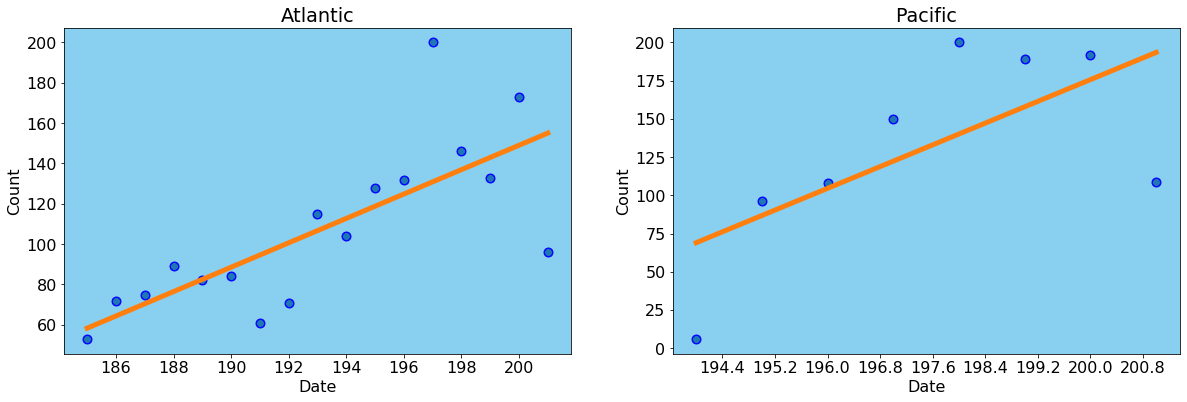

In [26]:
# plot: Hurricane frequency of occurrence by year

# values
atlantic_counts_by_year = atlantic.groupby('Date').size().to_frame('Count').reset_index()
pacific_counts_by_year = pacific.groupby('Date').size().to_frame('Count').reset_index()

# plot configuration
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 16})

# Atlantic
ax = plt.subplot(1,2,1)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Atlantic')
x_values = np.array(atlantic_counts_by_year['Date'].tolist()).astype(np.int)
y_values = atlantic_counts_by_year['Count'].tolist()
x_label = 'Date'
y_label = 'Count'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line, linewidth=5)

# Pacific
ax = plt.subplot(1,2,2)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Pacific')
x_values = np.array(pacific_counts_by_year['Date'].tolist()).astype(np.int)
y_values = pacific_counts_by_year['Count'].tolist()
x_label = 'Date'
y_label = 'Count'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.show()

In [27]:
# plot:  Hurricane max wind by year

# values
atlantic_max_wind_by_year = atlantic.groupby('Date').mean().round(2).reset_index().drop([116])
pacific_max_wind_by_year = pacific.groupby('Date').mean().round(2).reset_index()

# plot configuration
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 16})

# Atlantic
ax = plt.subplot(1,2,1)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Atlantic')
x_values = np.array(atlantic_max_wind_by_year['Date'].tolist()).astype(np.int)
y_values = atlantic_max_wind_by_year['Maximum Wind'].tolist()
x_label = 'Date'
y_label = 'Max Wind(avg)'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line, linewidth=5)

# Pacific
ax = plt.subplot(1,2,2)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor('#89cff0')
ax.set_title('Pacific')
x_values = np.array(pacific_max_wind_by_year['Date'].tolist()).astype(np.int)
y_values = pacific_max_wind_by_year['Maximum Wind'].tolist()
x_label = 'Date'
y_label = 'Max Wind(avg)'

plt.scatter(x_values, y_values,marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.show()

KeyError: '[116] not found in axis'

In [28]:
# plot: Hurricane onset location

In [29]:
# general data